In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('income (1).csv')

In [3]:
df

,Name,Age,Income($)
0,Rob,27,70000
1,Michael,29,90000
2,Mohan,29,61000
3,Ismail,28,60000
4,Kory,42,150000
5,Gautam,39,155000
6,David,41,160000
7,Andrea,38,162000
8,Brad,36,156000
9,Angelina,35,130000


In [4]:
X=df[['Age','Income($)']]

In [5]:
X

,Age,Income($)
0,27,70000
1,29,90000
2,29,61000
3,28,60000
4,42,150000
5,39,155000
6,41,160000
7,38,162000
8,36,156000
9,35,130000


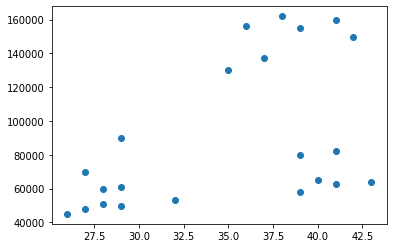

In [6]:
plt.scatter(df['Age'],df['Income($)'])

## Without Scaling

In [7]:
from sklearn.cluster import KMeans

In [8]:
km=KMeans(n_clusters=3)
y_pred=km.fit_predict(X)

In [9]:
df['cluster']=y_pred

In [10]:
df.head()

,Name,Age,Income($),cluster
0,Rob,27,70000,2
1,Michael,29,90000,2
2,Mohan,29,61000,0
3,Ismail,28,60000,0
4,Kory,42,150000,1


In [11]:
df1=df[df['cluster']==0]
df2=df[df['cluster']==1]
df3=df[df['cluster']==2]

In [12]:
km.cluster_centers_

array([[3.29090909e+01, 5.61363636e+04],
       [3.82857143e+01, 1.50000000e+05],
       [3.40000000e+01, 8.05000000e+04]])

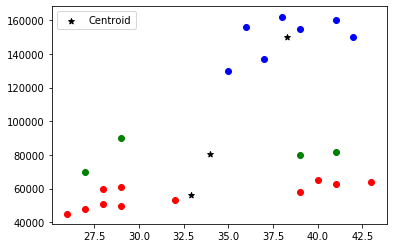

In [13]:
plt.scatter(df1['Age'],df1['Income($)'],color='red')
plt.scatter(df2['Age'],df2['Income($)'],color='blue')
plt.scatter(df3['Age'],df3['Income($)'],color='green')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='Black',marker='*',label='Centroid')
plt.legend()
plt.show()

### With Scaling Data

In [15]:
from sklearn.preprocessing import MinMaxScaler

In [16]:
sc=MinMaxScaler()

In [19]:
df['Age']=sc.fit_transform(df[['Age']])
df['Income($)']=sc.fit_transform(df[['Income($)']])

In [20]:
X=df[['Age','Income($)']]

In [21]:
km=KMeans(n_clusters=3)
y_pred=km.fit_predict(X)

In [22]:
df['cluster2']=y_pred

In [23]:
df.head()

,Name,Age,Income($),cluster,cluster2
0,Rob,0.058824,0.213675,2,1
1,Michael,0.176471,0.384615,2,1
2,Mohan,0.176471,0.136752,0,1
3,Ismail,0.117647,0.128205,0,1
4,Kory,0.941176,0.897436,1,0


In [24]:
df4=df[df['cluster2']==0]
df5=df[df['cluster2']==1]
df6=df[df['cluster2']==2]

In [25]:
km.cluster_centers_

array([[0.72268908, 0.8974359 ],
       [0.1372549 , 0.11633428],
       [0.85294118, 0.2022792 ]])

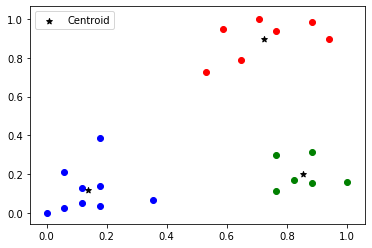

In [26]:
plt.scatter(df4['Age'],df4['Income($)'],color='red')
plt.scatter(df5['Age'],df5['Income($)'],color='blue')
plt.scatter(df6['Age'],df6['Income($)'],color='green')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='Black',marker='*',label='Centroid')
plt.legend()
plt.show()

# How to find optimum k 

## 1)Elbow Method

In [36]:
wcss=[]
k_range=range(1,10)
for k in k_range:
    km=KMeans(n_clusters=k)
    km.fit(df[['Age','Income($)']])
    wcss.append(km.inertia_)

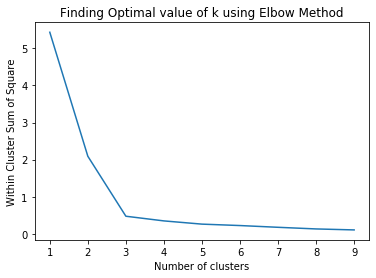

In [37]:
sns.lineplot(k_range,wcss)
plt.xlabel('Number of clusters')
plt.ylabel('Within Cluster Sum of Square')
plt.title('Finding Optimal value of k using Elbow Method')
plt.show()

In [38]:
km.labels_

array([1, 7, 1, 1, 4, 4, 4, 6, 6, 0, 0, 3, 3, 3, 3, 8, 2, 2, 2, 5, 5, 2])

In [39]:
km.inertia_

0.10629897421405128

## Silhouette Score

In [34]:
from sklearn.metrics import silhouette_score

In [43]:
wcss=[]
silhoutte={}
k_range=range(2,10)
for k in k_range:
    km=KMeans(n_clusters=k)
    km.fit(df[['Age','Income($)']])
    wcss.append(km.inertia_)
    silhoutte[k]=silhouette_score(X,km.labels_,metric='euclidean')

In [45]:
silhoutte

{2: 0.5600636053855829,
 3: 0.7129710183539275,
 4: 0.6256554192312763,
 5: 0.48141882451765067,
 6: 0.4251720801528371,
 7: 0.4522080792289985,
 8: 0.3580059150146837,
 9: 0.3297972557038307}